In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [10]:
def load_data(file_path):
    try:
        # Use on_bad_lines='skip' to skip problematic rows
        data = pd.read_csv(file_path, delimiter=';', quoting=3, on_bad_lines='skip')
        return data
    except Exception as e:
        print(f"Error reading the CSV file: {e}")
        return None

# Tester la fonction
file_path = r'C:/Users/vikne/Documents/Master 2/Semestre 9/Intelligence artificielle/Travel-Order-Resolver/ai/nlp/dataset/tokens/token.csv'
data = load_data(file_path)
data.head() if data is not None else print("Failed to load data.")

,text,tokens,ner_tags,spacy_ner_tags
0,As-tu un itinéraire précis de REIMS à VANDŒUVR...,"""['As', '-', 'tu', 'un', 'itinéraire', 'précis...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0]","[{'start': 30, 'end': 35, 'label': 'DEP'}, {'s..."
1,Comment puis-je aller à PETIT-BOURG en venant ...,"""['Comment', 'puis', '-je', 'aller', 'à', 'PET...","[0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0]","[{'start': 24, 'end': 35, 'label': 'ARR'}, {'s..."
2,Comment atteindre MANTES-LA-JOLIE à partir de ...,"""['Comment', 'atteindre', 'MANTES-LA-JOLIE', '...","[0, 0, 2, 0, 0, 0, 1, 0]","[{'start': 18, 'end': 33, 'label': 'ARR'}, {'s..."
3,Combien coûte un trajet direct en taxi de VILL...,"""['Combien', 'coûte', 'un', 'trajet', 'direct'...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0]","[{'start': 42, 'end': 64, 'label': 'DEP'}, {'s..."
4,As-tu un itinéraire précis de TARBES à LE MOULE ?,"""['As', '-', 'tu', 'un', 'itinéraire', 'précis...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0]","[{'start': 30, 'end': 36, 'label': 'DEP'}, {'s..."


In [11]:
def process_json_columns(data):
    try:
        for col in ['tokens', 'ner_tags', 'spacy_ner_tags']:
            data[col] = data[col].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
        return data
    except Exception as e:
        print(f"Error converting JSON-like columns: {e}")
        return None

# Tester la fonction
if data is not None:
    data = process_json_columns(data)
    data.head()

In [12]:
def calculate_entity_statistics(data):
    entity_counts = {}
    for ner_list in data['spacy_ner_tags']:
        for entity in ner_list:
            label = entity['label']
            entity_counts[label] = entity_counts.get(label, 0) + 1
    
    entity_df = pd.DataFrame(
        list(entity_counts.items()), columns=['Entity Label', 'Count']
    ).sort_values(by='Count', ascending=False)
    return entity_df

# Tester la fonction
if data is not None:
    entity_df = calculate_entity_statistics(data)
    print(entity_df)

  Entity Label   Count
0          DEP  394240
1          ARR  394240


Top 5 des entités nommées les plus fréquentes :
  Entity Label   Count
0          DEP  394240
1          ARR  394240


C:\Users\vikne\AppData\Local\Temp\ipykernel_18456\16543268.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Entity Label', data=entity_df, palette='viridis')


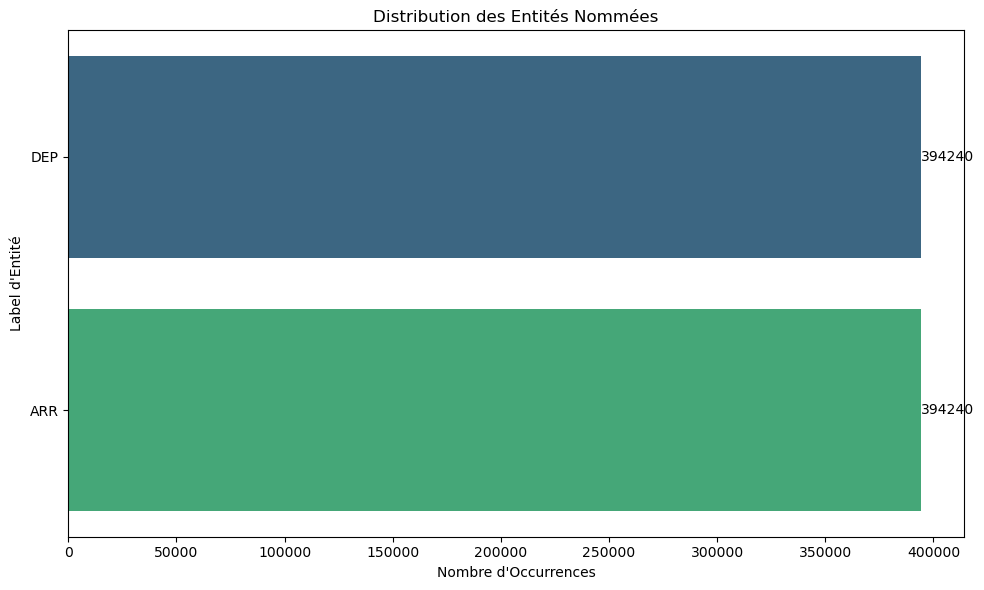

In [16]:
def plot_entity_statistics(entity_df):
    # Afficher les entités les plus fréquentes sous forme de tableau textuel
    print("Top 5 des entités nommées les plus fréquentes :")
    print(entity_df.head(5))
    
    # Tracer le graphique
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Count', y='Entity Label', data=entity_df, palette='viridis')
    plt.title('Distribution des Entités Nommées')
    plt.xlabel("Nombre d'Occurrences")
    plt.ylabel("Label d'Entité")
    
    # Ajouter des annotations pour chaque barre
    for i, row in entity_df.iterrows():
        plt.text(row['Count'] + 1, i, f"{row['Count']}", va='center')
    plt.tight_layout()
    plt.show()

# Tester la fonction
if 'entity_df' in locals():
    plot_entity_statistics(entity_df)

Statistiques sur la longueur des phrases (en tokens) :
- Longueur moyenne : 66.7 tokens
- Longueur minimale : 1 tokens
- Longueur maximale : 928 tokens
- Longueur médiane : 20.0 tokens


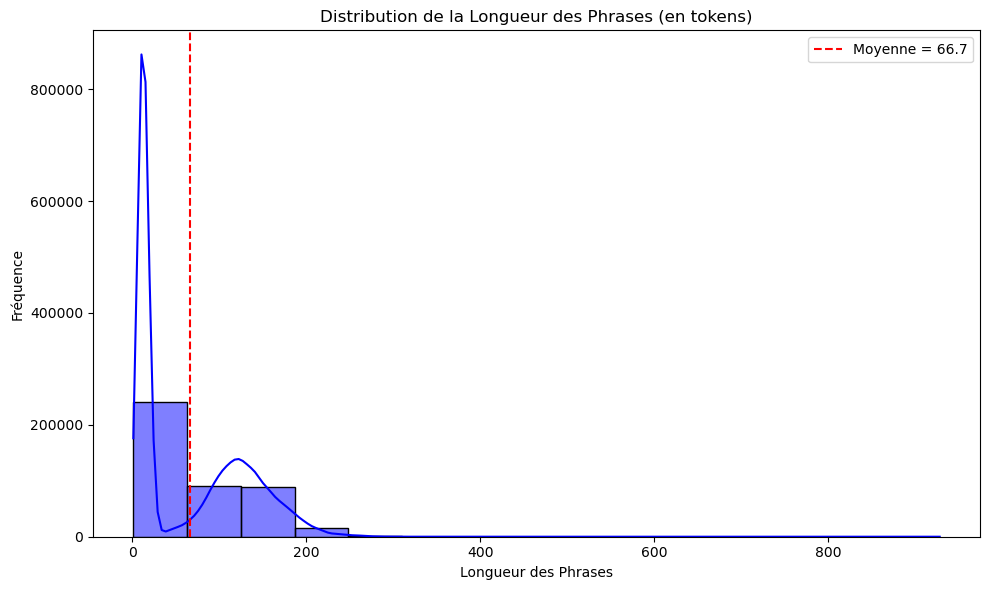

In [17]:
def plot_sentence_length_distribution(data):
    # Calculer les statistiques textuelles
    data['sentence_length'] = data['tokens'].apply(len)
    avg_length = data['sentence_length'].mean()
    min_length = data['sentence_length'].min()
    max_length = data['sentence_length'].max()
    median_length = data['sentence_length'].median()

    # Afficher les statistiques textuelles
    print("Statistiques sur la longueur des phrases (en tokens) :")
    print(f"- Longueur moyenne : {avg_length:.1f} tokens")
    print(f"- Longueur minimale : {min_length} tokens")
    print(f"- Longueur maximale : {max_length} tokens")
    print(f"- Longueur médiane : {median_length:.1f} tokens")
    
    # Tracer le graphique
    plt.figure(figsize=(10, 6))
    sns.histplot(data['sentence_length'], bins=15, kde=True, color='blue')
    plt.title('Distribution de la Longueur des Phrases (en tokens)')
    plt.xlabel('Longueur des Phrases')
    plt.ylabel('Fréquence')
    
    # Ajouter une annotation textuelle sur le graphique
    plt.axvline(avg_length, color='red', linestyle='--', label=f'Moyenne = {avg_length:.1f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Tester la fonction
if data is not None:
    plot_sentence_length_distribution(data)

Statistiques sur la répartition des entités par phrase :
- Nombre total de phrases : 435834
- Nombre moyen d'entités par phrase : 1.81
- Nombre maximum d'entités dans une phrase : 3
- Le plus fréquent : 2 entités dans 394237 phrases


C:\Users\vikne\AppData\Local\Temp\ipykernel_18456\3989976768.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num_entities', data=data, palette='muted')


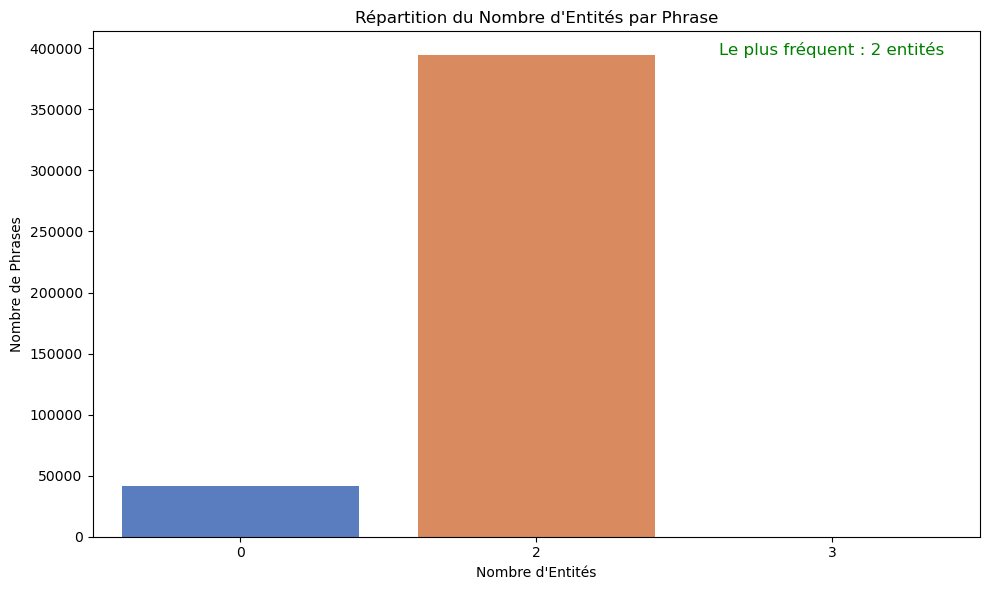

In [18]:
def plot_entity_distribution_per_sentence(data):
    # Calculer le nombre d'entités par phrase
    data['num_entities'] = data['spacy_ner_tags'].apply(len)
    
    # Calculer des statistiques textuelles
    total_sentences = len(data)
    avg_entities_per_sentence = data['num_entities'].mean()
    max_entities = data['num_entities'].max()
    most_common_entities_count = data['num_entities'].value_counts().idxmax()
    most_common_entities_freq = data['num_entities'].value_counts().max()

    # Afficher les statistiques textuelles
    print("Statistiques sur la répartition des entités par phrase :")
    print(f"- Nombre total de phrases : {total_sentences}")
    print(f"- Nombre moyen d'entités par phrase : {avg_entities_per_sentence:.2f}")
    print(f"- Nombre maximum d'entités dans une phrase : {max_entities}")
    print(f"- Le plus fréquent : {most_common_entities_count} entités dans {most_common_entities_freq} phrases")
    
    # Tracer le graphique
    plt.figure(figsize=(10, 6))
    sns.countplot(x='num_entities', data=data, palette='muted')
    plt.title("Répartition du Nombre d'Entités par Phrase")
    plt.xlabel("Nombre d'Entités")
    plt.ylabel("Nombre de Phrases")
    
    # Ajouter des annotations sur le graphique
    plt.text(most_common_entities_count, most_common_entities_freq + 5, 
             f"Le plus fréquent : {most_common_entities_count} entités", 
             color='green', fontsize=12, ha='center')
    plt.tight_layout()
    plt.show()

# Tester la fonction
if data is not None:
    plot_entity_distribution_per_sentence(data)